# 2D Grid

In [1]:
import os
import sys
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import torch as t
import torch
import torch.nn.functional as F
from torch import nn


sys.path.insert(1, os.path.join(sys.path[0], ".."))
from divdis import DivDisLoss
from disagree import DisagreeLoss

from toy_data.grid import generate_data, plot_data, sample_minibatch, savefig

SEED = 45
torch.manual_seed(SEED)
np.random.seed(SEED)

In [2]:
from typing import Literal
LossType = Literal["divdis", "focal", "ace", "conf"]

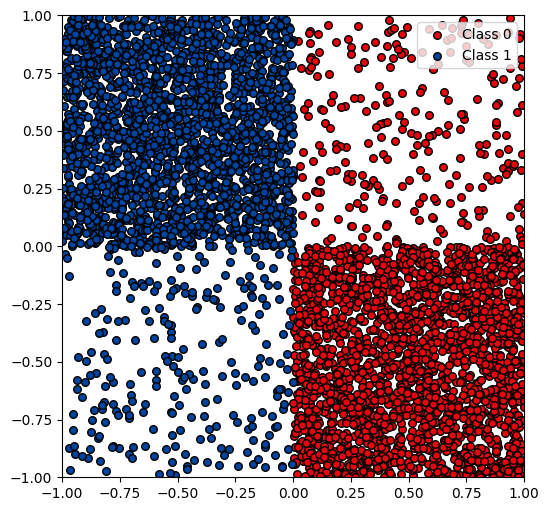

In [3]:
test_data = generate_data(5000, mix_rate=0.1)
plot_data(test_data)

In [4]:
# ok, getting expected results ish (with low mix rate, incrasing batch size to 4/mix rate) when trainin for loots of epochs
# should run sweep over mix rates, using same batch size for divdis, mix_rate informed batch size for ace 
# (maybe need to tune learning rate too?)
#should also try with other method

# should change accuracy to helld out even mix rate accuracy  for different labels
# then we should think about how to do this more dynamically (I guess i should also implement for 
# shoudl also)

# could also try to implement a version that modulates exponential 



/Users/oliverdaniels-koch/Library/Caches/pypoetry/virtualenvs/diverse-gen-KG5DY0Zz-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tensor(0.5443, grad_fn=<MaxBackward1>) tensor(0.4932, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
Generating plots for 0/1000


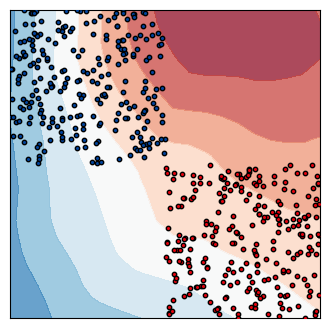

<Figure size 640x480 with 0 Axes>

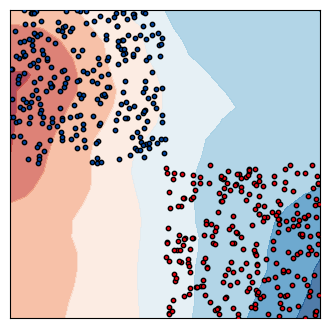

<Figure size 640x480 with 0 Axes>

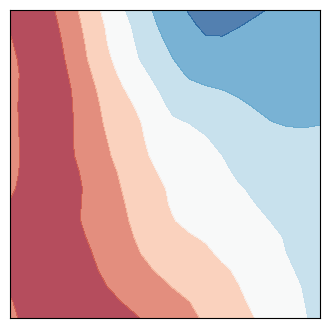

tensor(0.5432, grad_fn=<MaxBackward1>) tensor(0.4920, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
Generating plots for 1/1000


<Figure size 640x480 with 0 Axes>

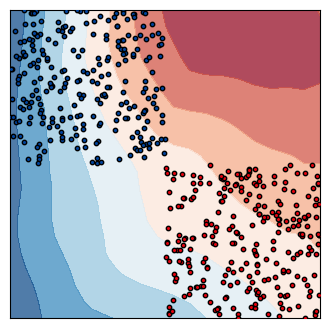

<Figure size 640x480 with 0 Axes>

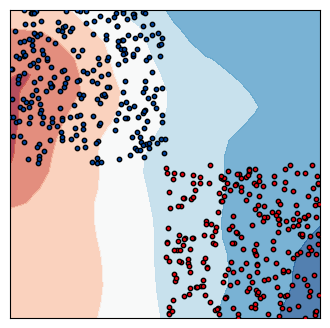

<Figure size 640x480 with 0 Axes>

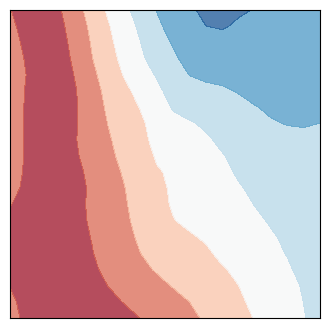

tensor(0.5429, grad_fn=<MaxBackward1>) tensor(0.4938, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
Generating plots for 2/1000


<Figure size 640x480 with 0 Axes>

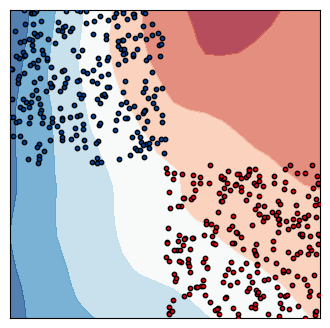

<Figure size 640x480 with 0 Axes>

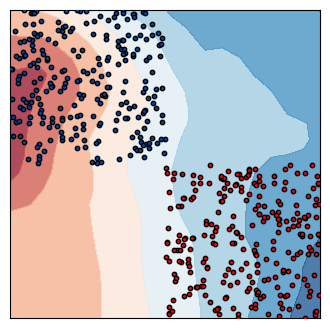

<Figure size 640x480 with 0 Axes>

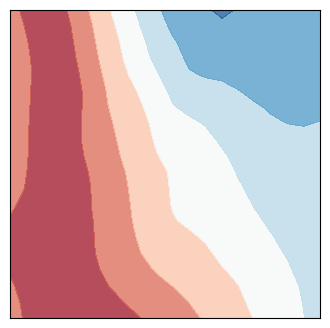

tensor(0.5420, grad_fn=<MaxBackward1>) tensor(0.4938, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
Generating plots for 3/1000


<Figure size 640x480 with 0 Axes>

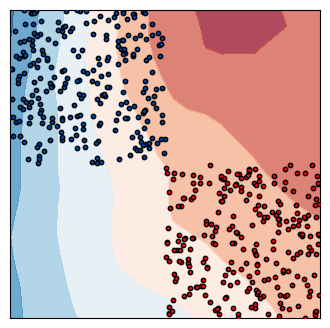

<Figure size 640x480 with 0 Axes>

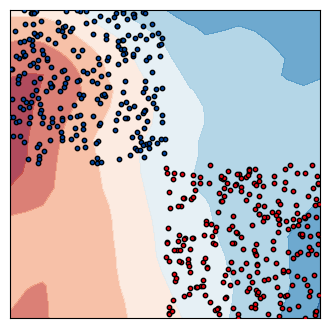

<Figure size 640x480 with 0 Axes>

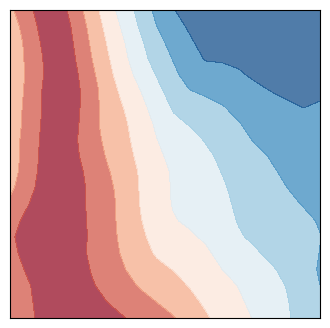

tensor(0.5421, grad_fn=<MaxBackward1>) tensor(0.4943, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
Generating plots for 4/1000


<Figure size 640x480 with 0 Axes>

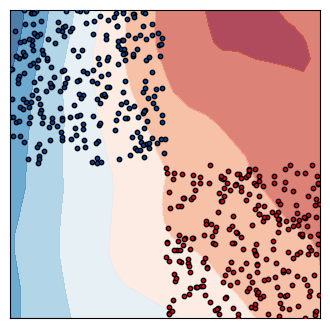

<Figure size 640x480 with 0 Axes>

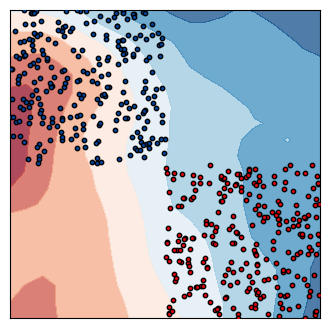

<Figure size 640x480 with 0 Axes>

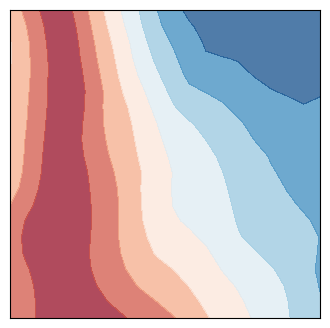

tensor(0.5410, grad_fn=<MaxBackward1>) tensor(0.4945, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.5414, grad_fn=<MaxBackward1>) tensor(0.4954, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.5409, grad_fn=<MaxBackward1>) tensor(0.4948, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.5403, grad_fn=<MaxBackward1>) tensor(0.4943, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
Generating plots for 8/1000


<Figure size 640x480 with 0 Axes>

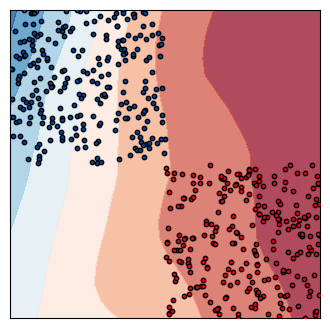

<Figure size 640x480 with 0 Axes>

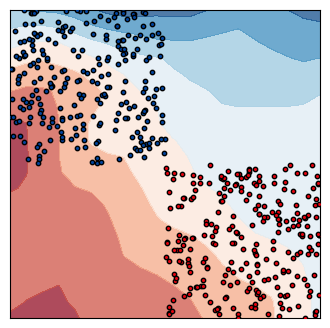

<Figure size 640x480 with 0 Axes>

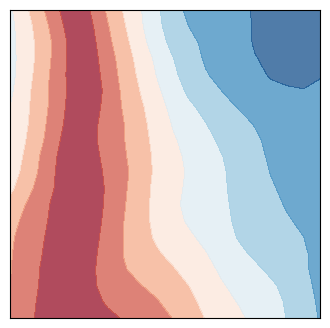

tensor(0.5413, grad_fn=<MaxBackward1>) tensor(0.4939, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.5441, grad_fn=<MaxBackward1>) tensor(0.4930, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.5441, grad_fn=<MaxBackward1>) tensor(0.4918, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.5430, grad_fn=<MaxBackward1>) tensor(0.4906, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.5474, grad_fn=<MaxBackward1>) tensor(0.4899, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.5508, grad_fn=<MaxBackward1>) tensor(0.4886, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.5538, grad_fn=<MaxBackward1>) tensor(0.4870, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.5529, grad_fn=<MaxBackward1>) tensor(0.4857, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
Generating plots for 16/1000


<Figure size 640x480 with 0 Axes>

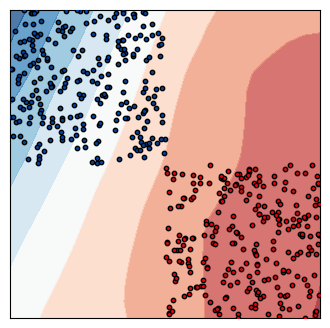

<Figure size 640x480 with 0 Axes>

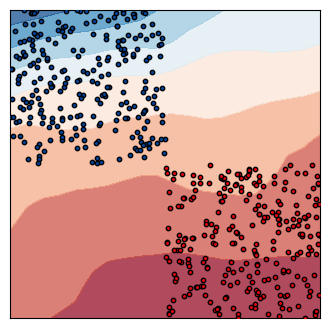

<Figure size 640x480 with 0 Axes>

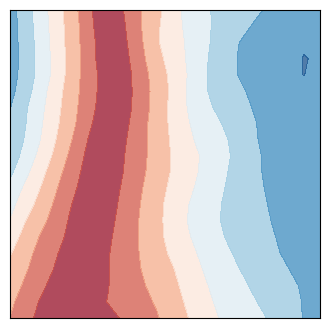

tensor(0.5489, grad_fn=<MaxBackward1>) tensor(0.4842, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.5526, grad_fn=<MaxBackward1>) tensor(0.4835, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.5577, grad_fn=<MaxBackward1>) tensor(0.4832, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.5598, grad_fn=<MaxBackward1>) tensor(0.4842, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.5564, grad_fn=<MaxBackward1>) tensor(0.4795, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.5677, grad_fn=<MaxBackward1>) tensor(0.4790, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.5613, grad_fn=<MaxBackward1>) tensor(0.4773, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.5713, grad_fn=<MaxBackward1>) tensor(0.4771, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.5521, grad_fn=<MaxBackward1>) tensor(0.4746, grad_fn=<MinBackward1>)
frac uncertainty w

<Figure size 640x480 with 0 Axes>

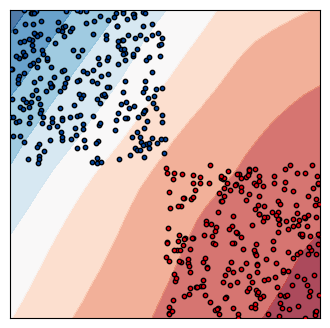

<Figure size 640x480 with 0 Axes>

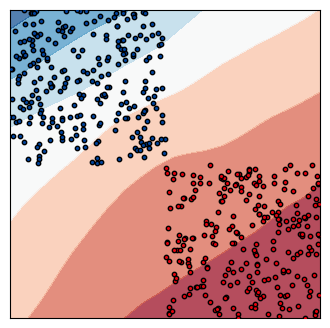

<Figure size 640x480 with 0 Axes>

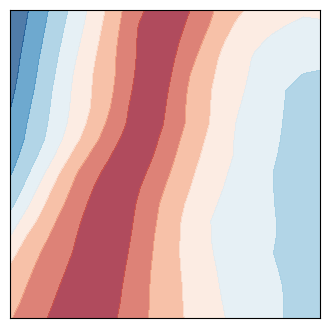

tensor(0.5924, grad_fn=<MaxBackward1>) tensor(0.4621, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.5832, grad_fn=<MaxBackward1>) tensor(0.4595, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.5835, grad_fn=<MaxBackward1>) tensor(0.4574, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.5981, grad_fn=<MaxBackward1>) tensor(0.4571, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.5986, grad_fn=<MaxBackward1>) tensor(0.4544, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.5718, grad_fn=<MaxBackward1>) tensor(0.4566, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.5996, grad_fn=<MaxBackward1>) tensor(0.4544, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.6012, grad_fn=<MaxBackward1>) tensor(0.4478, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.6184, grad_fn=<MaxBackward1>) tensor(0.4471, grad_fn=<MinBackward1>)
frac uncertainty w

<Figure size 640x480 with 0 Axes>

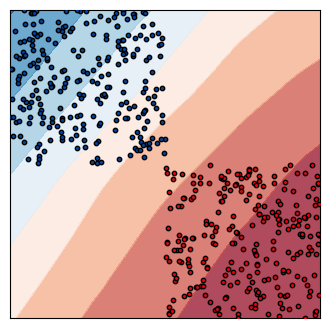

<Figure size 640x480 with 0 Axes>

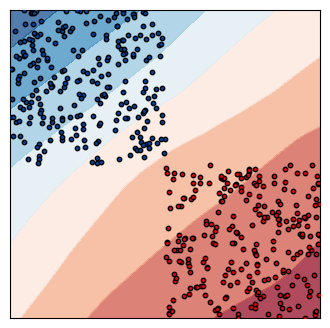

<Figure size 640x480 with 0 Axes>

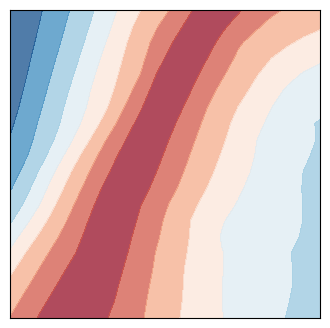

tensor(0.6561, grad_fn=<MaxBackward1>) tensor(0.4191, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.6477, grad_fn=<MaxBackward1>) tensor(0.4287, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.6524, grad_fn=<MaxBackward1>) tensor(0.4214, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.6366, grad_fn=<MaxBackward1>) tensor(0.4213, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.6581, grad_fn=<MaxBackward1>) tensor(0.4046, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.6791, grad_fn=<MaxBackward1>) tensor(0.4212, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.6395, grad_fn=<MaxBackward1>) tensor(0.4047, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.6793, grad_fn=<MaxBackward1>) tensor(0.3932, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.6782, grad_fn=<MaxBackward1>) tensor(0.3960, grad_fn=<MinBackward1>)
frac uncertainty w

<Figure size 640x480 with 0 Axes>

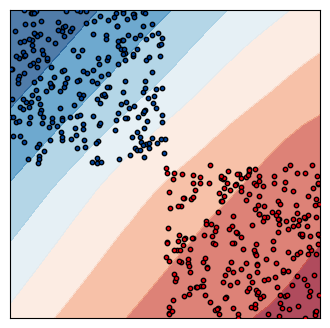

<Figure size 640x480 with 0 Axes>

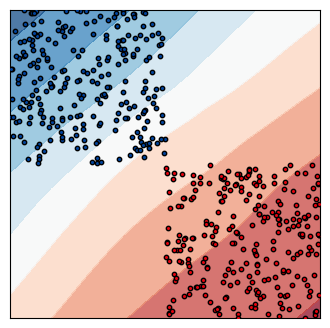

<Figure size 640x480 with 0 Axes>

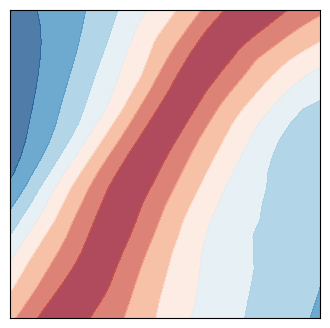

tensor(0.7172, grad_fn=<MaxBackward1>) tensor(0.3682, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.7202, grad_fn=<MaxBackward1>) tensor(0.3676, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.7096, grad_fn=<MaxBackward1>) tensor(0.3652, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.7168, grad_fn=<MaxBackward1>) tensor(0.3578, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.6971, grad_fn=<MaxBackward1>) tensor(0.3539, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.6976, grad_fn=<MaxBackward1>) tensor(0.3429, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.7458, grad_fn=<MaxBackward1>) tensor(0.3359, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.7591, grad_fn=<MaxBackward1>) tensor(0.3441, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.7348, grad_fn=<MaxBackward1>) tensor(0.3343, grad_fn=<MinBackward1>)
frac uncertainty w

<Figure size 640x480 with 0 Axes>

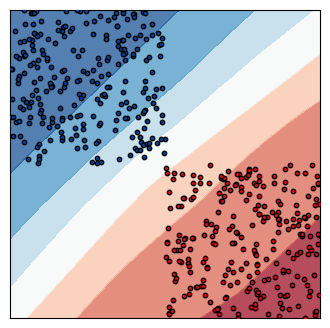

<Figure size 640x480 with 0 Axes>

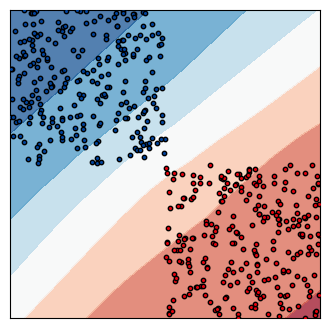

<Figure size 640x480 with 0 Axes>

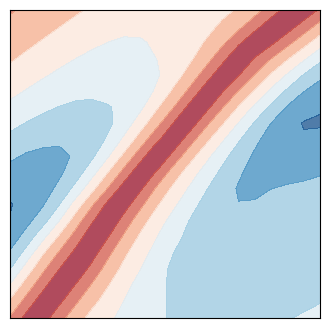

tensor(0.8872, grad_fn=<MaxBackward1>) tensor(0.2066, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.8857, grad_fn=<MaxBackward1>) tensor(0.1769, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9027, grad_fn=<MaxBackward1>) tensor(0.2239, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9163, grad_fn=<MaxBackward1>) tensor(0.1847, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.8952, grad_fn=<MaxBackward1>) tensor(0.1559, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9100, grad_fn=<MaxBackward1>) tensor(0.1875, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9022, grad_fn=<MaxBackward1>) tensor(0.1633, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9211, grad_fn=<MaxBackward1>) tensor(0.1607, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9166, grad_fn=<MaxBackward1>) tensor(0.1535, grad_fn=<MinBackward1>)
frac uncertainty w

<Figure size 640x480 with 0 Axes>

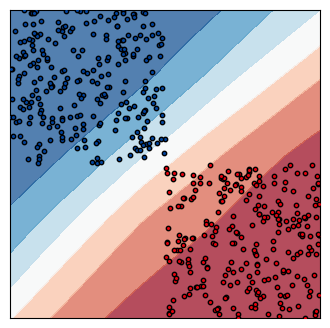

<Figure size 640x480 with 0 Axes>

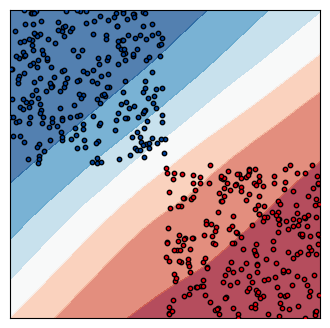

<Figure size 640x480 with 0 Axes>

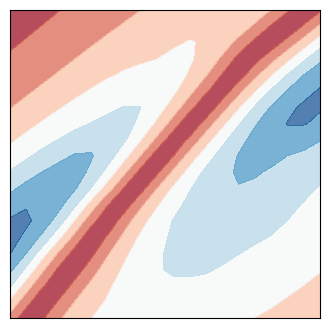

tensor(0.9285, grad_fn=<MaxBackward1>) tensor(0.1108, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9518, grad_fn=<MaxBackward1>) tensor(0.1222, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9524, grad_fn=<MaxBackward1>) tensor(0.1174, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9163, grad_fn=<MaxBackward1>) tensor(0.1159, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9525, grad_fn=<MaxBackward1>) tensor(0.1082, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9448, grad_fn=<MaxBackward1>) tensor(0.1084, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9456, grad_fn=<MaxBackward1>) tensor(0.0905, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9550, grad_fn=<MaxBackward1>) tensor(0.0899, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
Generating plots for 128/1000


<Figure size 640x480 with 0 Axes>

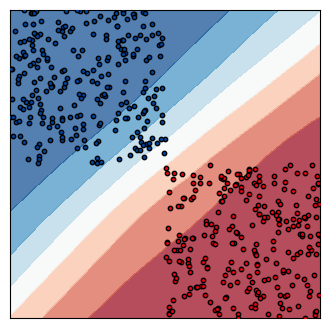

<Figure size 640x480 with 0 Axes>

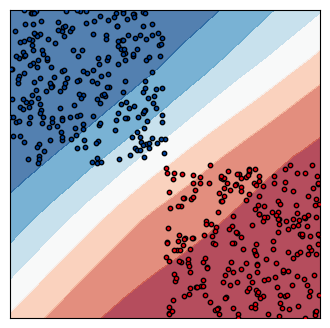

<Figure size 640x480 with 0 Axes>

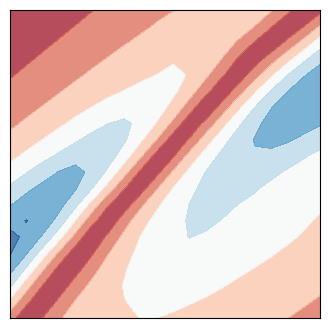

tensor(0.9573, grad_fn=<MaxBackward1>) tensor(0.0887, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9582, grad_fn=<MaxBackward1>) tensor(0.0920, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9562, grad_fn=<MaxBackward1>) tensor(0.0974, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9462, grad_fn=<MaxBackward1>) tensor(0.0948, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9616, grad_fn=<MaxBackward1>) tensor(0.0785, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9595, grad_fn=<MaxBackward1>) tensor(0.0798, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9678, grad_fn=<MaxBackward1>) tensor(0.0694, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9712, grad_fn=<MaxBackward1>) tensor(0.0867, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9670, grad_fn=<MaxBackward1>) tensor(0.0842, grad_fn=<MinBackward1>)
frac uncertainty w

<Figure size 640x480 with 0 Axes>

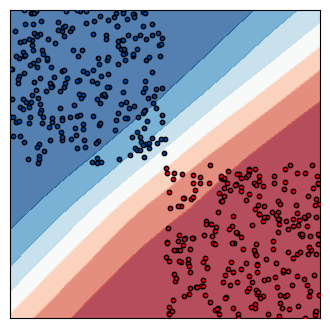

<Figure size 640x480 with 0 Axes>

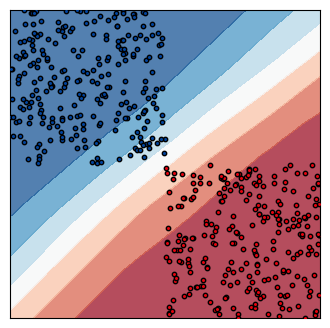

<Figure size 640x480 with 0 Axes>

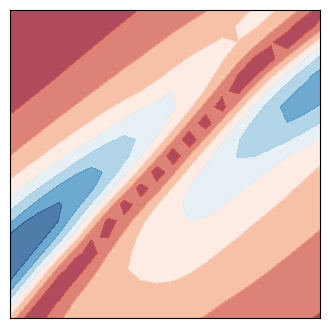

tensor(0.9819, grad_fn=<MaxBackward1>) tensor(0.0559, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9829, grad_fn=<MaxBackward1>) tensor(0.0426, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9816, grad_fn=<MaxBackward1>) tensor(0.0591, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9775, grad_fn=<MaxBackward1>) tensor(0.0413, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9807, grad_fn=<MaxBackward1>) tensor(0.0436, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9812, grad_fn=<MaxBackward1>) tensor(0.0441, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9841, grad_fn=<MaxBackward1>) tensor(0.0383, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9819, grad_fn=<MaxBackward1>) tensor(0.0419, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9791, grad_fn=<MaxBackward1>) tensor(0.0502, grad_fn=<MinBackward1>)
frac uncertainty w

<Figure size 640x480 with 0 Axes>

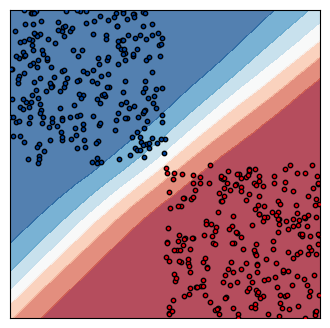

<Figure size 640x480 with 0 Axes>

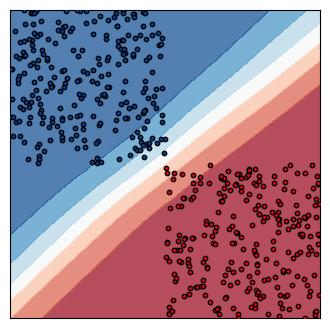

<Figure size 640x480 with 0 Axes>

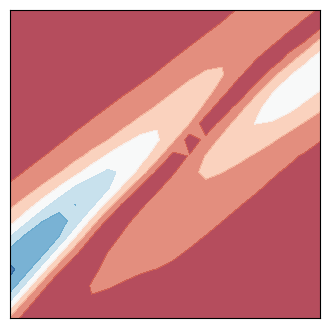

tensor(0.9944, grad_fn=<MaxBackward1>) tensor(0.0250, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9812, grad_fn=<MaxBackward1>) tensor(0.0149, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9894, grad_fn=<MaxBackward1>) tensor(0.0153, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9917, grad_fn=<MaxBackward1>) tensor(0.0151, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9863, grad_fn=<MaxBackward1>) tensor(0.0128, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9938, grad_fn=<MaxBackward1>) tensor(0.0193, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9946, grad_fn=<MaxBackward1>) tensor(0.0176, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9923, grad_fn=<MaxBackward1>) tensor(0.0131, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9881, grad_fn=<MaxBackward1>) tensor(0.0172, grad_fn=<MinBackward1>)
frac uncertainty w

<Figure size 640x480 with 0 Axes>

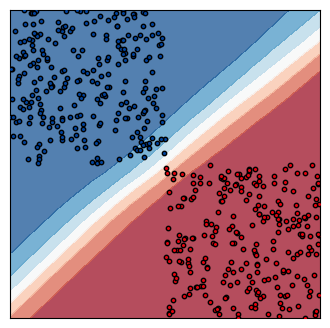

<Figure size 640x480 with 0 Axes>

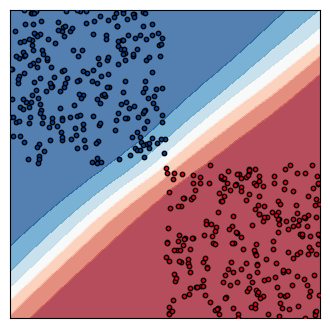

<Figure size 640x480 with 0 Axes>

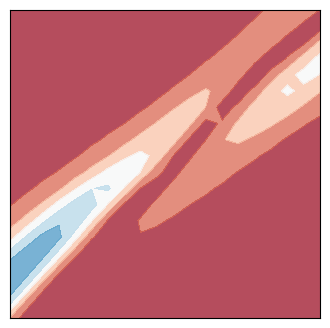

tensor(0.9971, grad_fn=<MaxBackward1>) tensor(0.0129, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9950, grad_fn=<MaxBackward1>) tensor(0.0057, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9978, grad_fn=<MaxBackward1>) tensor(0.0094, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9970, grad_fn=<MaxBackward1>) tensor(0.0087, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9964, grad_fn=<MaxBackward1>) tensor(0.0085, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9980, grad_fn=<MaxBackward1>) tensor(0.0076, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9971, grad_fn=<MaxBackward1>) tensor(0.0048, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9954, grad_fn=<MaxBackward1>) tensor(0.0043, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9973, grad_fn=<MaxBackward1>) tensor(0.0074, grad_fn=<MinBackward1>)
frac uncertainty w

<Figure size 640x480 with 0 Axes>

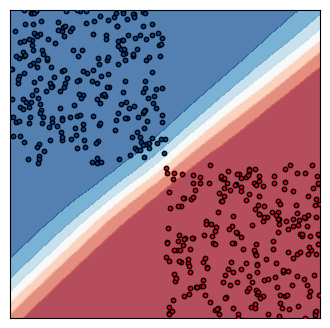

<Figure size 640x480 with 0 Axes>

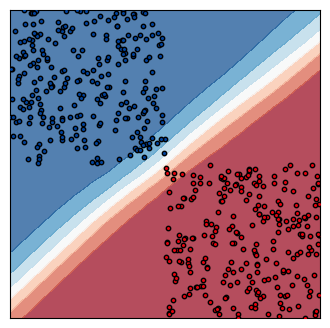

<Figure size 640x480 with 0 Axes>

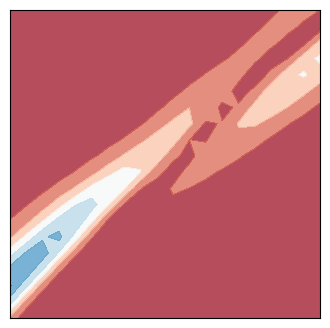

tensor(0.9987, grad_fn=<MaxBackward1>) tensor(0.0050, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9982, grad_fn=<MaxBackward1>) tensor(0.0030, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9983, grad_fn=<MaxBackward1>) tensor(0.0028, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9964, grad_fn=<MaxBackward1>) tensor(0.0033, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9985, grad_fn=<MaxBackward1>) tensor(0.0043, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9983, grad_fn=<MaxBackward1>) tensor(0.0025, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9985, grad_fn=<MaxBackward1>) tensor(0.0043, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9978, grad_fn=<MaxBackward1>) tensor(0.0030, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9983, grad_fn=<MaxBackward1>) tensor(0.0031, grad_fn=<MinBackward1>)
frac uncertainty w

<Figure size 640x480 with 0 Axes>

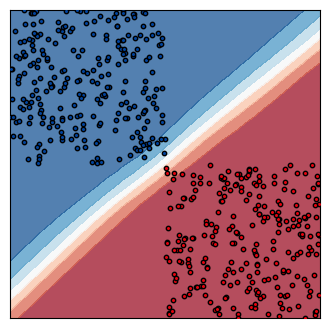

<Figure size 640x480 with 0 Axes>

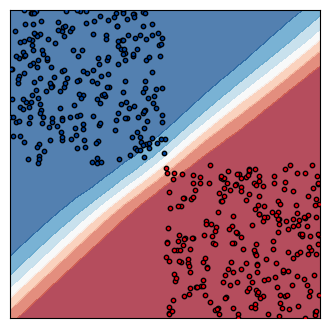

<Figure size 640x480 with 0 Axes>

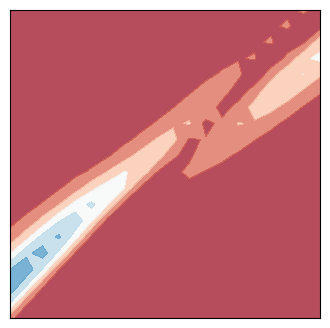

tensor(0.9969, grad_fn=<MaxBackward1>) tensor(0.0020, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9987, grad_fn=<MaxBackward1>) tensor(0.0016, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9983, grad_fn=<MaxBackward1>) tensor(0.0023, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9981, grad_fn=<MaxBackward1>) tensor(0.0017, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9992, grad_fn=<MaxBackward1>) tensor(0.0017, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9983, grad_fn=<MaxBackward1>) tensor(0.0010, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9981, grad_fn=<MaxBackward1>) tensor(0.0011, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9987, grad_fn=<MaxBackward1>) tensor(0.0015, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9987, grad_fn=<MaxBackward1>) tensor(0.0017, grad_fn=<MinBackward1>)
frac uncertainty w

<Figure size 640x480 with 0 Axes>

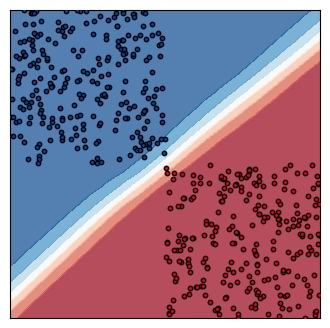

<Figure size 640x480 with 0 Axes>

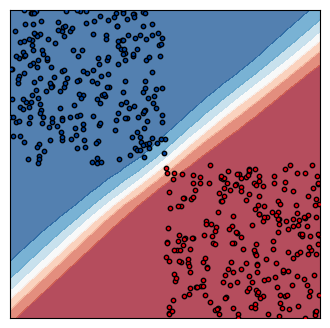

<Figure size 640x480 with 0 Axes>

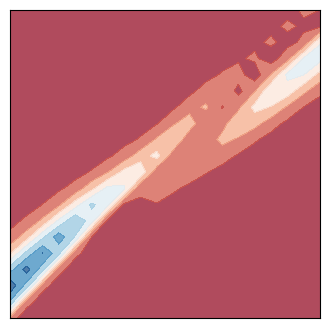

tensor(0.9996, grad_fn=<MaxBackward1>) tensor(0.0014, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9992, grad_fn=<MaxBackward1>) tensor(0.0010, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9996, grad_fn=<MaxBackward1>) tensor(0.0015, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9990, grad_fn=<MaxBackward1>) tensor(0.0006, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9984, grad_fn=<MaxBackward1>) tensor(0.0018, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9996, grad_fn=<MaxBackward1>) tensor(0.0012, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9993, grad_fn=<MaxBackward1>) tensor(0.0011, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9993, grad_fn=<MaxBackward1>) tensor(0.0009, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9995, grad_fn=<MaxBackward1>) tensor(0.0017, grad_fn=<MinBackward1>)
frac uncertainty w

<Figure size 640x480 with 0 Axes>

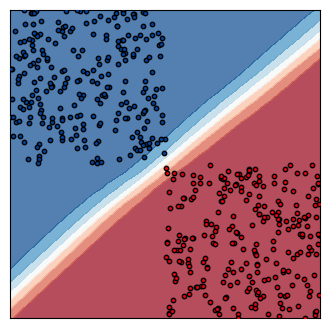

<Figure size 640x480 with 0 Axes>

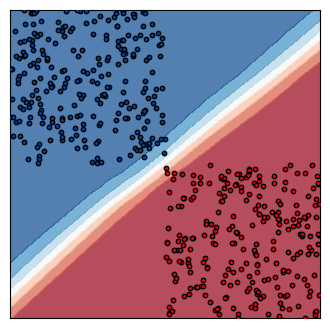

<Figure size 640x480 with 0 Axes>

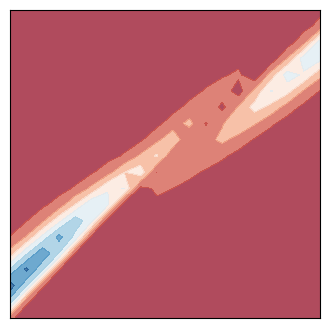

tensor(0.9996, grad_fn=<MaxBackward1>) tensor(0.0004, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9995, grad_fn=<MaxBackward1>) tensor(0.0007, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9994, grad_fn=<MaxBackward1>) tensor(0.0006, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9992, grad_fn=<MaxBackward1>) tensor(0.0008, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9995, grad_fn=<MaxBackward1>) tensor(0.0008, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9995, grad_fn=<MaxBackward1>) tensor(0.0005, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9997, grad_fn=<MaxBackward1>) tensor(0.0004, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9996, grad_fn=<MaxBackward1>) tensor(0.0006, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9994, grad_fn=<MaxBackward1>) tensor(0.0005, grad_fn=<MinBackward1>)
frac uncertainty w

<Figure size 640x480 with 0 Axes>

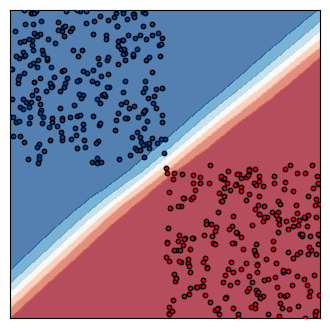

<Figure size 640x480 with 0 Axes>

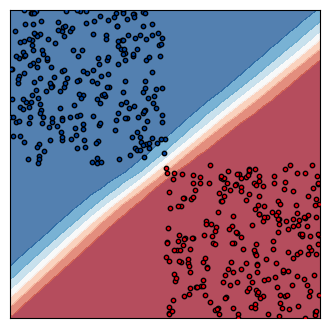

<Figure size 640x480 with 0 Axes>

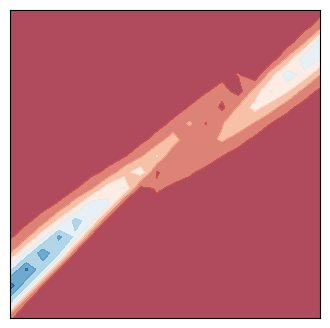

tensor(0.9998, grad_fn=<MaxBackward1>) tensor(0.0004, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9996, grad_fn=<MaxBackward1>) tensor(0.0002, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9994, grad_fn=<MaxBackward1>) tensor(0.0006, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9998, grad_fn=<MaxBackward1>) tensor(0.0003, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9998, grad_fn=<MaxBackward1>) tensor(0.0004, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9995, grad_fn=<MaxBackward1>) tensor(0.0002, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9996, grad_fn=<MaxBackward1>) tensor(0.0004, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9994, grad_fn=<MaxBackward1>) tensor(0.0005, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9997, grad_fn=<MaxBackward1>) tensor(0.0003, grad_fn=<MinBackward1>)
frac uncertainty w

<Figure size 640x480 with 0 Axes>

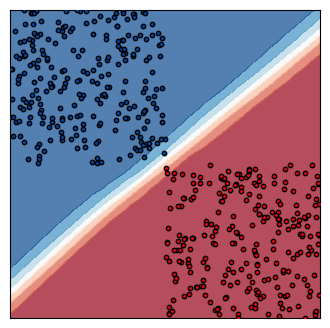

<Figure size 640x480 with 0 Axes>

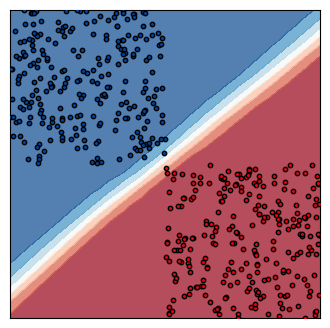

<Figure size 640x480 with 0 Axes>

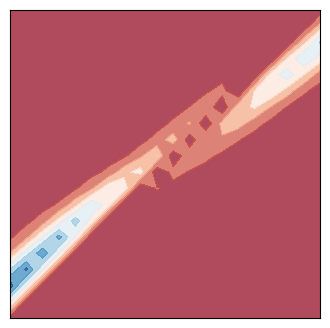

tensor(0.9994, grad_fn=<MaxBackward1>) tensor(0.0003, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9998, grad_fn=<MaxBackward1>) tensor(0.0002, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9999, grad_fn=<MaxBackward1>) tensor(0.0002, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9998, grad_fn=<MaxBackward1>) tensor(0.0001, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9997, grad_fn=<MaxBackward1>) tensor(0.0004, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9998, grad_fn=<MaxBackward1>) tensor(0.0002, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9997, grad_fn=<MaxBackward1>) tensor(0.0005, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9999, grad_fn=<MaxBackward1>) tensor(0.0002, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9999, grad_fn=<MaxBackward1>) tensor(0.0002, grad_fn=<MinBackward1>)
frac uncertainty w

<Figure size 640x480 with 0 Axes>

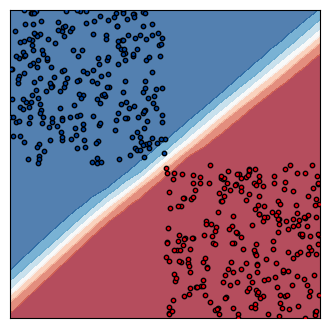

<Figure size 640x480 with 0 Axes>

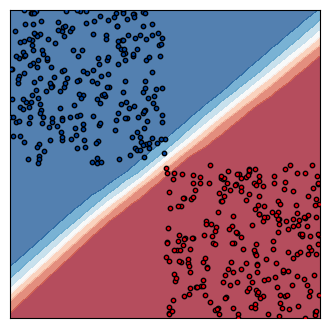

<Figure size 640x480 with 0 Axes>

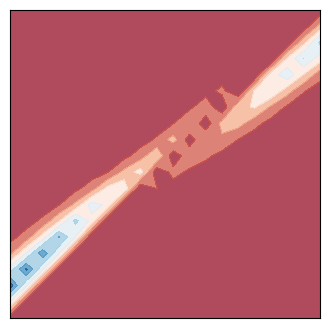

tensor(0.9998, grad_fn=<MaxBackward1>) tensor(8.9340e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9999, grad_fn=<MaxBackward1>) tensor(0.0001, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9997, grad_fn=<MaxBackward1>) tensor(0.0001, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9999, grad_fn=<MaxBackward1>) tensor(0.0002, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9997, grad_fn=<MaxBackward1>) tensor(0.0003, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9999, grad_fn=<MaxBackward1>) tensor(0.0001, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9997, grad_fn=<MaxBackward1>) tensor(0.0002, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9998, grad_fn=<MaxBackward1>) tensor(0.0004, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9999, grad_fn=<MaxBackward1>) tensor(0.0001, grad_fn=<MinBackward1>)
frac uncertain

<Figure size 640x480 with 0 Axes>

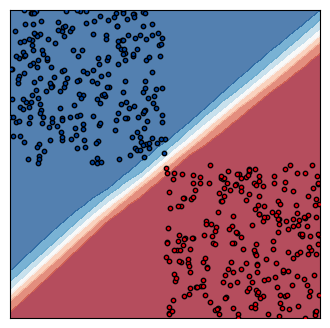

<Figure size 640x480 with 0 Axes>

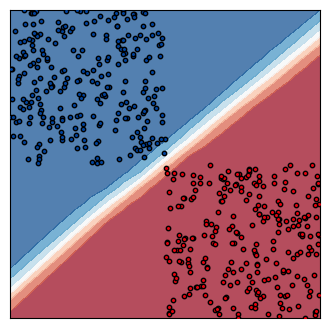

<Figure size 640x480 with 0 Axes>

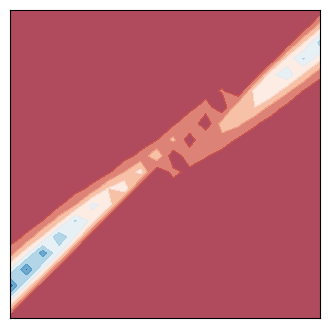

tensor(0.9999, grad_fn=<MaxBackward1>) tensor(6.1229e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9998, grad_fn=<MaxBackward1>) tensor(9.0813e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9998, grad_fn=<MaxBackward1>) tensor(6.4206e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9999, grad_fn=<MaxBackward1>) tensor(8.2041e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9999, grad_fn=<MaxBackward1>) tensor(0.0001, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9999, grad_fn=<MaxBackward1>) tensor(9.7414e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9997, grad_fn=<MaxBackward1>) tensor(0.0001, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9999, grad_fn=<MaxBackward1>) tensor(7.9549e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9998, grad_fn=<MaxBackward1>) tensor(0.0002, grad_fn=<MinBackwa

<Figure size 640x480 with 0 Axes>

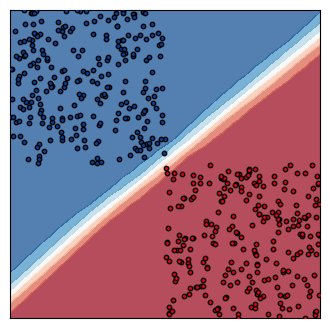

<Figure size 640x480 with 0 Axes>

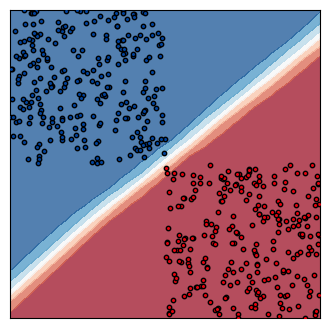

<Figure size 640x480 with 0 Axes>

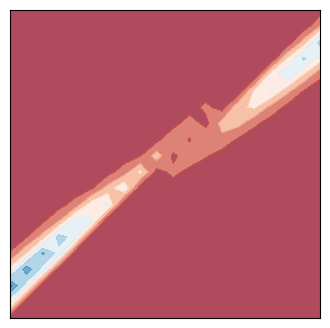

tensor(0.9999, grad_fn=<MaxBackward1>) tensor(6.9945e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9997, grad_fn=<MaxBackward1>) tensor(7.9646e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9999, grad_fn=<MaxBackward1>) tensor(4.1687e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(1.0000, grad_fn=<MaxBackward1>) tensor(9.0189e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9999, grad_fn=<MaxBackward1>) tensor(0.0002, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9999, grad_fn=<MaxBackward1>) tensor(8.4444e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9998, grad_fn=<MaxBackward1>) tensor(0.0001, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9998, grad_fn=<MaxBackward1>) tensor(3.9380e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9999, grad_fn=<MaxBackward1>) tensor(6.9563e-05, grad_fn=<MinBa

<Figure size 640x480 with 0 Axes>

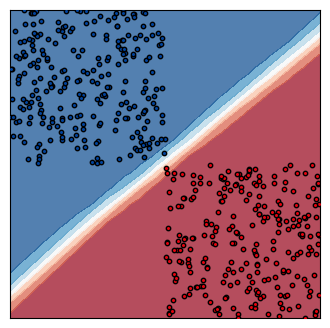

<Figure size 640x480 with 0 Axes>

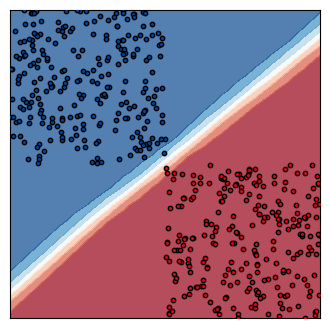

<Figure size 640x480 with 0 Axes>

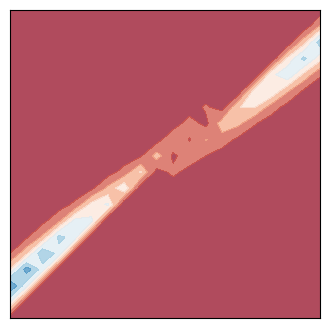

tensor(1.0000, grad_fn=<MaxBackward1>) tensor(0.0002, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9999, grad_fn=<MaxBackward1>) tensor(0.0001, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(1.0000, grad_fn=<MaxBackward1>) tensor(5.2258e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9999, grad_fn=<MaxBackward1>) tensor(0.0001, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9999, grad_fn=<MaxBackward1>) tensor(3.6543e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9999, grad_fn=<MaxBackward1>) tensor(0.0002, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9999, grad_fn=<MaxBackward1>) tensor(7.1587e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9999, grad_fn=<MaxBackward1>) tensor(7.0771e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9999, grad_fn=<MaxBackward1>) tensor(4.6737e-05, grad_fn=<MinBackward1>

<Figure size 640x480 with 0 Axes>

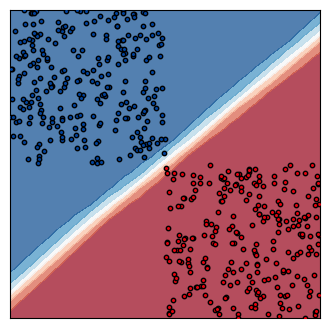

<Figure size 640x480 with 0 Axes>

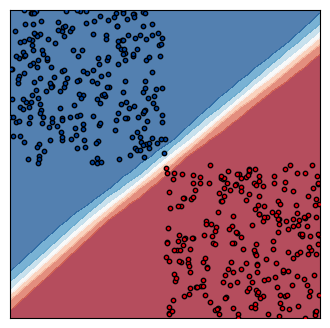

<Figure size 640x480 with 0 Axes>

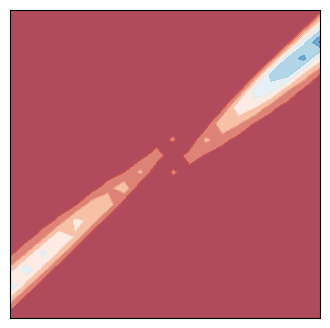

tensor(0.9999, grad_fn=<MaxBackward1>) tensor(6.4021e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9999, grad_fn=<MaxBackward1>) tensor(4.8696e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9999, grad_fn=<MaxBackward1>) tensor(0.0001, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9999, grad_fn=<MaxBackward1>) tensor(0.0001, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(1.0000, grad_fn=<MaxBackward1>) tensor(2.8729e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9999, grad_fn=<MaxBackward1>) tensor(9.1908e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(1.0000, grad_fn=<MaxBackward1>) tensor(2.5496e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9996, grad_fn=<MaxBackward1>) tensor(4.0545e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9999, grad_fn=<MaxBackward1>) tensor(7.7320e-05, grad_fn=<MinBa

<Figure size 640x480 with 0 Axes>

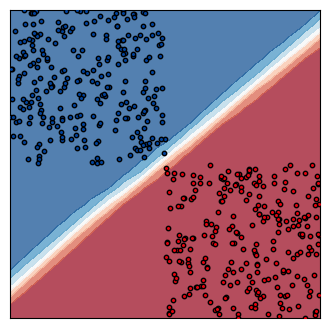

<Figure size 640x480 with 0 Axes>

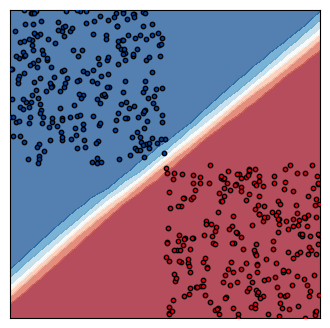

<Figure size 640x480 with 0 Axes>

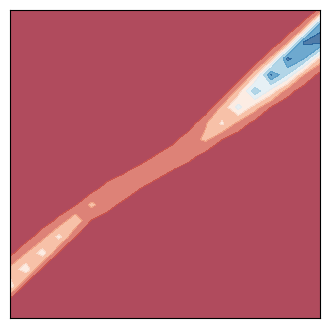

tensor(1.0000, grad_fn=<MaxBackward1>) tensor(0.0001, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9999, grad_fn=<MaxBackward1>) tensor(2.0723e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9999, grad_fn=<MaxBackward1>) tensor(4.5584e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(1.0000, grad_fn=<MaxBackward1>) tensor(9.8957e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(1.0000, grad_fn=<MaxBackward1>) tensor(2.0706e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(1.0000, grad_fn=<MaxBackward1>) tensor(1.9021e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(1.0000, grad_fn=<MaxBackward1>) tensor(1.8919e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9999, grad_fn=<MaxBackward1>) tensor(3.6024e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(1.0000, grad_fn=<MaxBackward1>) tensor(4.0778e-05, grad_fn=<M

<Figure size 640x480 with 0 Axes>

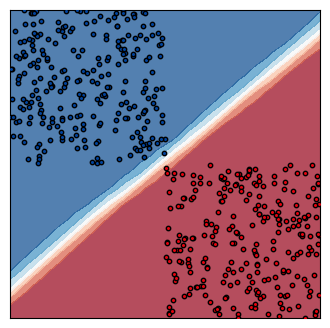

<Figure size 640x480 with 0 Axes>

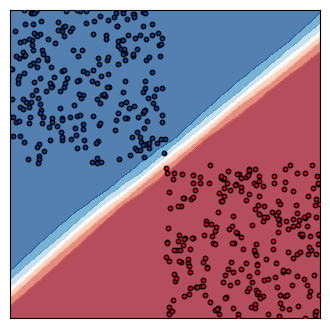

<Figure size 640x480 with 0 Axes>

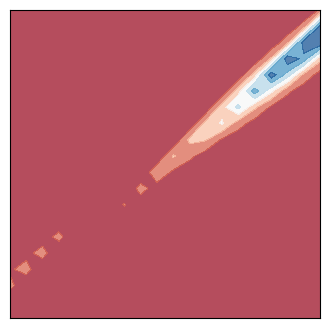

tensor(1.0000, grad_fn=<MaxBackward1>) tensor(1.4322e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(1.0000, grad_fn=<MaxBackward1>) tensor(1.9960e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(1.0000, grad_fn=<MaxBackward1>) tensor(1.2158e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9999, grad_fn=<MaxBackward1>) tensor(1.6140e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(1.0000, grad_fn=<MaxBackward1>) tensor(2.0307e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(0.9999, grad_fn=<MaxBackward1>) tensor(2.3755e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(1.0000, grad_fn=<MaxBackward1>) tensor(8.5532e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(1.0000, grad_fn=<MaxBackward1>) tensor(3.1545e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(1.0000, grad_fn=<MaxBackward1>) tensor(1.6237e-05, grad_f

<Figure size 640x480 with 0 Axes>

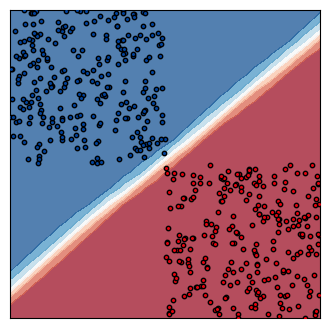

<Figure size 640x480 with 0 Axes>

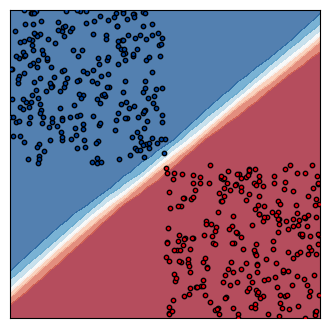

<Figure size 640x480 with 0 Axes>

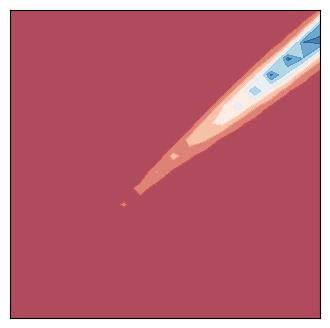

tensor(1.0000, grad_fn=<MaxBackward1>) tensor(4.0060e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(1.0000, grad_fn=<MaxBackward1>) tensor(4.4765e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(1.0000, grad_fn=<MaxBackward1>) tensor(2.5928e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(1.0000, grad_fn=<MaxBackward1>) tensor(1.8713e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(1.0000, grad_fn=<MaxBackward1>) tensor(3.5218e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(1.0000, grad_fn=<MaxBackward1>) tensor(1.4171e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(1.0000, grad_fn=<MaxBackward1>) tensor(1.5357e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(1.0000, grad_fn=<MaxBackward1>) tensor(3.9193e-05, grad_fn=<MinBackward1>)
frac uncertainty weight tensor(1.)
tensor(1.0000, grad_fn=<MaxBackward1>) tensor(1.6455e-05, grad_f

<Figure size 640x480 with 0 Axes>

In [5]:
batch_size = 32
test_batch_size = 100
train_iter = 1000 #25000
log_every = 100
heads = 2
aux_weight = 0.0
mix_rate = 1.0
gamma=1.0
loss: LossType = "conf"
train_separate = False

# also instead of

# For this toy dataset, directly maximizing L1 distance works too!
# mode, reduction, aux_weight = "l1", "mean", 0.1

exp_name = f"h{heads}_w{aux_weight}_{SEED}_{mix_rate}_{loss}_i{train_iter}_b{test_batch_size}{'_' + str(gamma) if gamma else ''}"
os.makedirs(f"figures/temp/{exp_name}", exist_ok=True)

fig_save_times = sorted(
    [1, 2, 3, 4, 8, 16, 32, 64, 120, 128] + [50 * n for n in range(200)]
)
fig_save_times = [t for t in fig_save_times if t < train_iter]

training_data = generate_data(500, train=True)
test_data = generate_data(5000, mix_rate=mix_rate)

net = torch.nn.Sequential(
    torch.nn.Linear(2, 40), nn.ReLU(), nn.Linear(40, 40), nn.ReLU(), nn.Linear(40, heads)
)
opt = torch.optim.Adam(net.parameters())
if loss == "divdis":
    loss_fn = DivDisLoss(heads=heads)
else:
    loss_fn = FocalDisLoss(heads=heads, gamma=gamma, mode=loss)


def plot_pred_grid(time=""):
    N = 20
    x = np.linspace(-1, 1, N)
    y = np.linspace(-1, 1, N)
    xv, yv = np.meshgrid(x, y)
    inpt = torch.tensor(np.stack([xv.reshape(-1), yv.reshape(-1)], axis=-1)).float()
    with torch.no_grad():
        preds = net(inpt).reshape(N, N, heads).sigmoid().cpu()

    tr_x, tr_y = training_data
    for i in range(heads):
        plt.figure(figsize=(4, 4))
        plt.contourf(xv, yv, preds[:, :, i], cmap="RdBu", alpha=0.75)
        for g, c in [(0, "#E7040F"), (1, "#00449E")]:
            tr_g = tr_x[tr_y.flatten() == g]
            plt.scatter(tr_g[:, 0], tr_g[:, 1], zorder=10, s=10, c=c, edgecolors="k")
        plt.xlim(-1.0, 1.0)
        ax = plt.gca()
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)
        savefig(f"temp/{exp_name}/{time}_h{i}", transparent=True)

def plot_head_disagreement(time=""):
    N = 20
    x = np.linspace(-1, 1, N)
    y = np.linspace(-1, 1, N)
    xv, yv = np.meshgrid(x, y)
    inpt = torch.tensor(np.stack([xv.reshape(-1), yv.reshape(-1)], axis=-1)).float()
    with torch.no_grad():
        preds = net(inpt).reshape(N, N, heads).sigmoid().cpu()
    plt.figure(figsize=(4, 4))
    plt.contourf(xv, yv, torch.abs(preds[:, :, 0] - preds[:, :, 1]), cmap="RdBu", alpha=0.75)
    plt.xlim(-1.0, 1.0)
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    savefig(f"temp/{exp_name}/{time}_disagreement", transparent=True)


#%%
metrics = defaultdict(list)
for t in range(train_iter):
    x, y = sample_minibatch(training_data, batch_size)
    logits = net(x)
    logits_chunked = torch.chunk(logits, heads, dim=-1)
    losses = [F.binary_cross_entropy_with_logits(logit, y) for logit in logits_chunked]
    xent = sum(losses)

    target_x, target_y = sample_minibatch(test_data, test_batch_size)
    target_logits = net(target_x)
    repulsion_loss = loss_fn(target_logits)

    full_loss = xent + aux_weight * repulsion_loss
    opt.zero_grad()
    full_loss.backward()
    opt.step()

    for i in range(heads):
        corrects_i = (target_logits[:, i] > 0) == target_y.flatten()
        acc_i = corrects_i.float().mean()
        metrics[f"acc_{i}"].append(acc_i.item())
    metrics[f"xent"].append(xent.item())
    metrics[f"repulsion_loss"].append(repulsion_loss.item())

    if t in fig_save_times:
        print(f"Generating plots for {t}/{train_iter}")
        plot_pred_grid(t)
        plot_head_disagreement(t)

    # if t % log_every == 0:
    #     print(f"{t=} xent {xent.item():.5f} aux {repulsion_loss.item():.5f}")

In [6]:
#%% Train single ERM model (for comparison in learning curve)
net = nn.Sequential(
    nn.Linear(2, 40), nn.ReLU(), nn.Linear(40, 40), nn.ReLU(), nn.Linear(40, heads)
)
opt = torch.optim.Adam(net.parameters())

for t in range(train_iter):
    x, y = sample_minibatch(training_data, batch_size)
    logits = net(x)
    logits_chunked = torch.chunk(logits, heads, dim=-1)
    losses = [F.binary_cross_entropy_with_logits(logit, y) for logit in logits_chunked]
    full_loss = sum(losses)
    opt.zero_grad()
    full_loss.backward()
    opt.step()

    target_x, target_y = sample_minibatch(test_data, test_batch_size)
    target_logits = net(target_x)
    for i in range(heads):
        corrects_i = (target_logits[:, i] > 0) == target_y.flatten()
        acc_i = corrects_i.float().mean()
        metrics[f"ERM_acc_{i}"].append(acc_i.item())
        print(acc_i.item())
    if t % log_every == 0:
        print(f"{t=} xent {xent.item():.5f}")

0.5099999904632568
0.5099999904632568
t=0 xent 0.00191
0.5199999809265137
0.49000000953674316
0.49000000953674316
0.47999998927116394
0.5299999713897705
0.5
0.47999998927116394
0.5299999713897705
0.3100000023841858
0.5899999737739563
0.28999999165534973
0.3499999940395355
0.27000001072883606
0.3499999940395355
0.18000000715255737
0.3199999928474426
0.25
0.3400000035762787
0.23000000417232513
0.23000000417232513
0.17000000178813934
0.23000000417232513
0.23000000417232513
0.25999999046325684
0.20000000298023224
0.28999999165534973
0.1899999976158142
0.23000000417232513
0.1899999976158142
0.23000000417232513
0.15000000596046448
0.20999999344348907
0.15000000596046448
0.23999999463558197
0.20000000298023224
0.23999999463558197
0.20000000298023224
0.20999999344348907
0.20000000298023224
0.23000000417232513
0.23999999463558197
0.3100000023841858
0.23999999463558197
0.2800000011920929
0.20999999344348907
0.2199999988079071
0.20999999344348907
0.23000000417232513
0.25999999046325684
0.28000000

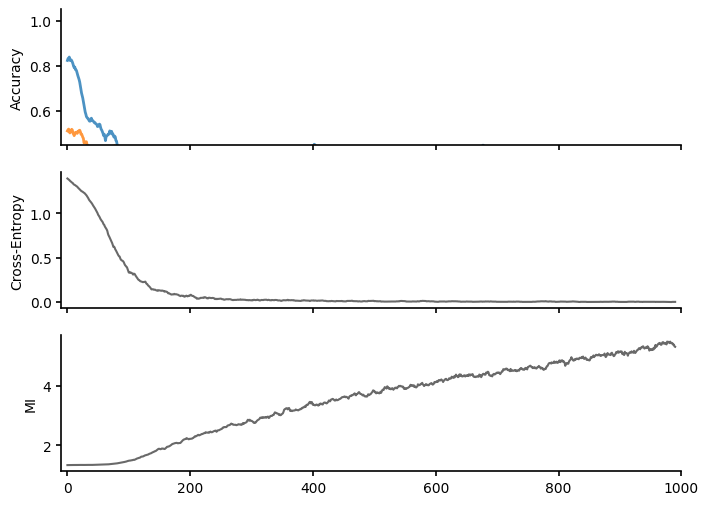

<Figure size 640x480 with 0 Axes>

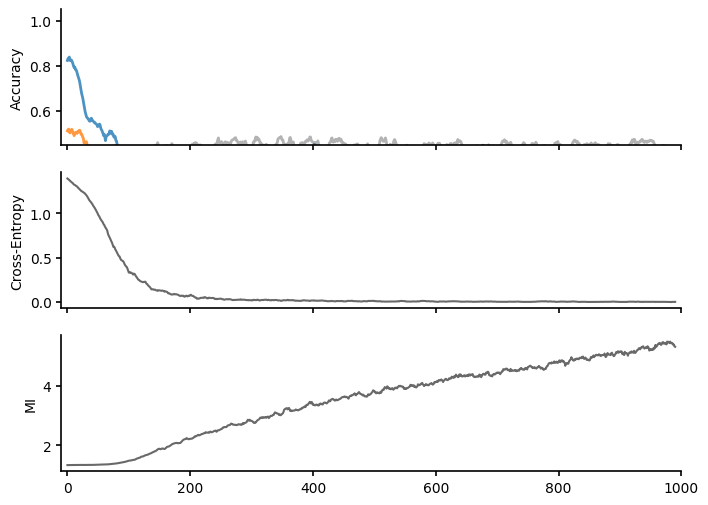

<Figure size 640x480 with 0 Axes>

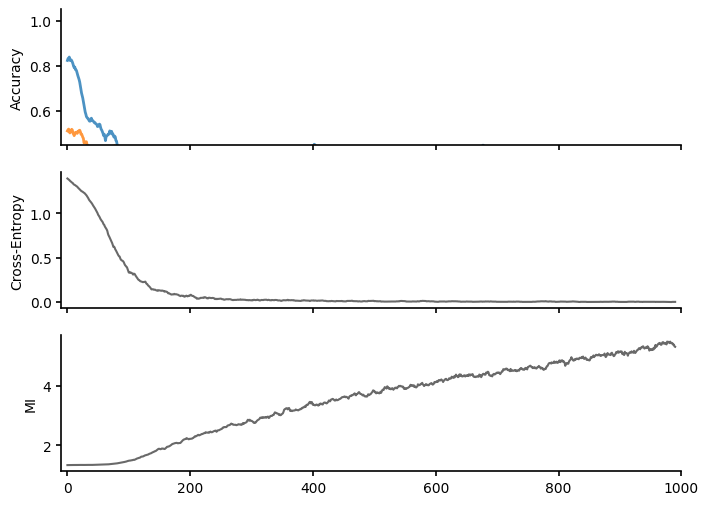

<Figure size 640x480 with 0 Axes>

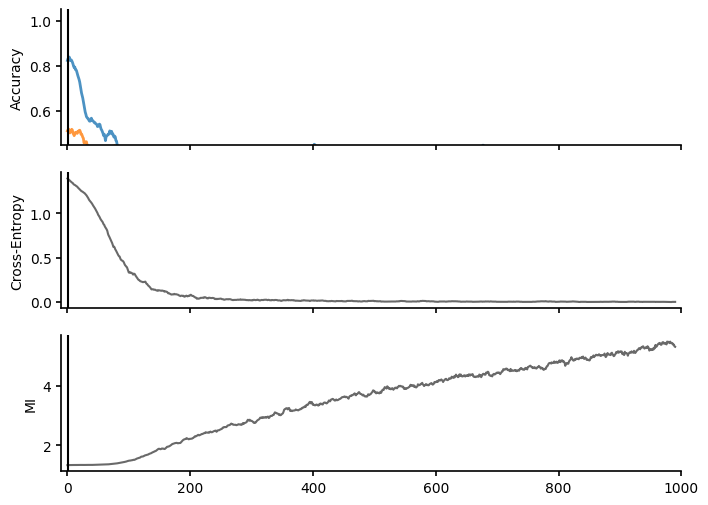

<Figure size 640x480 with 0 Axes>

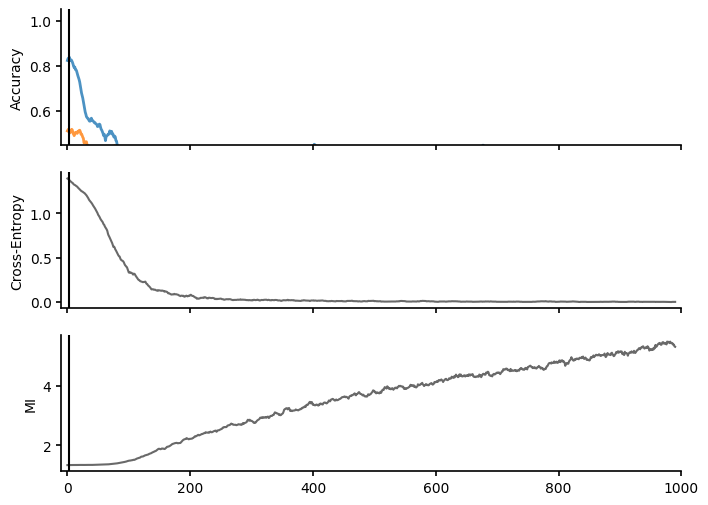

<Figure size 640x480 with 0 Axes>

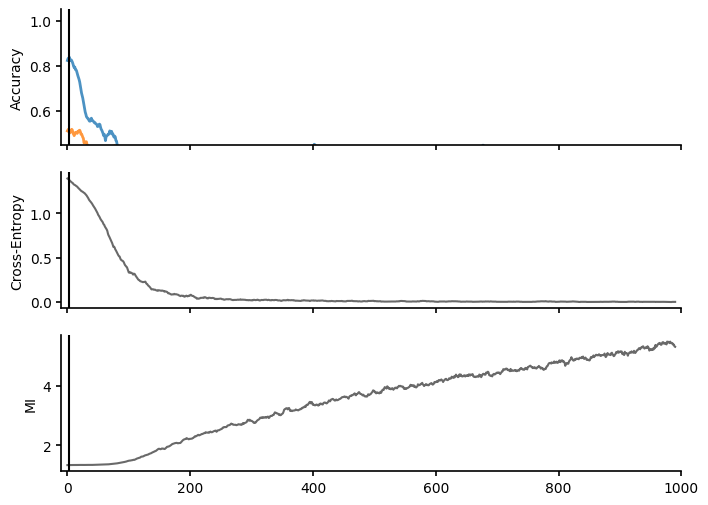

<Figure size 640x480 with 0 Axes>

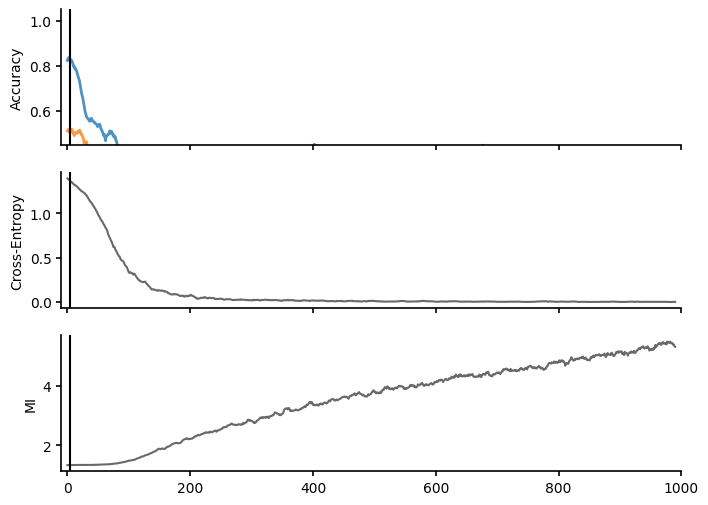

<Figure size 640x480 with 0 Axes>

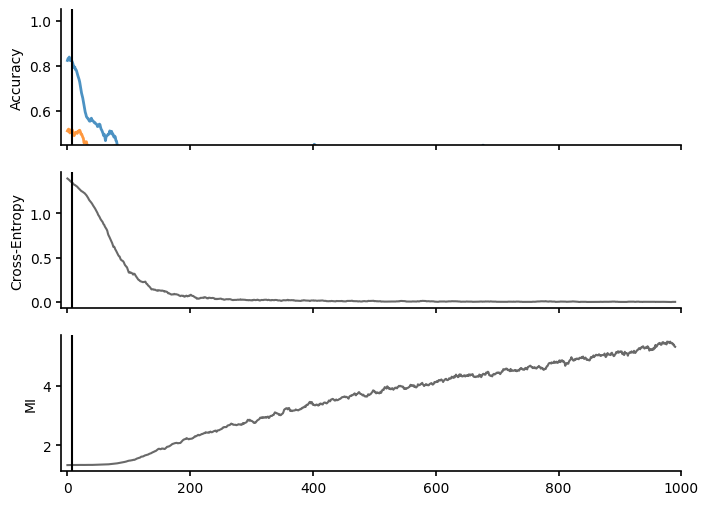

<Figure size 640x480 with 0 Axes>

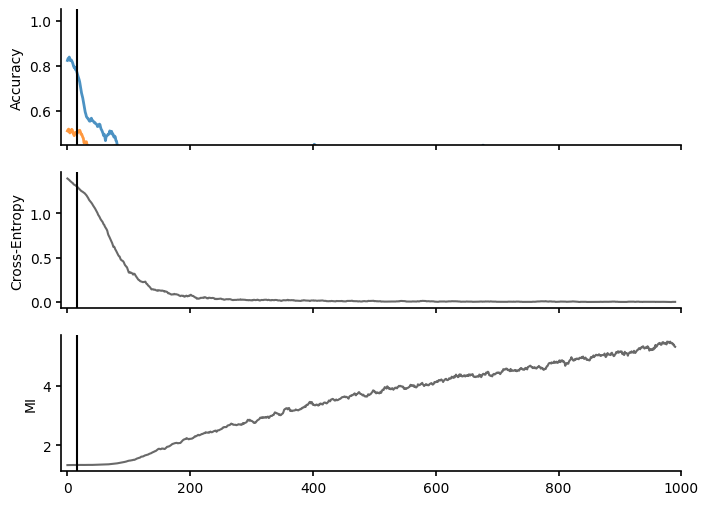

<Figure size 640x480 with 0 Axes>

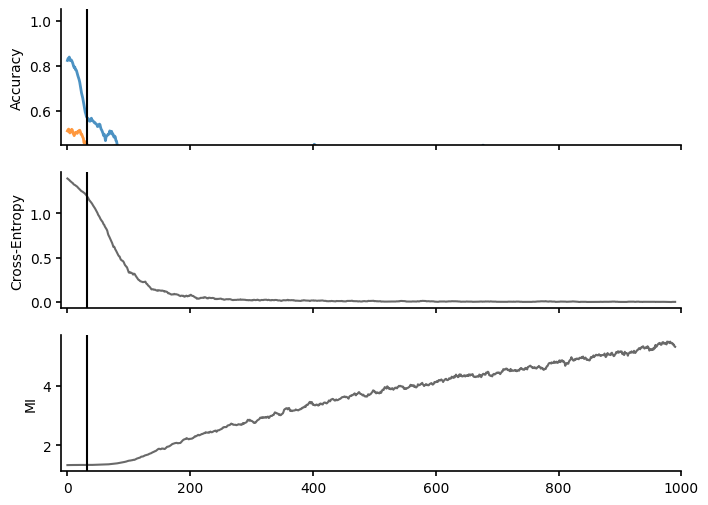

<Figure size 640x480 with 0 Axes>

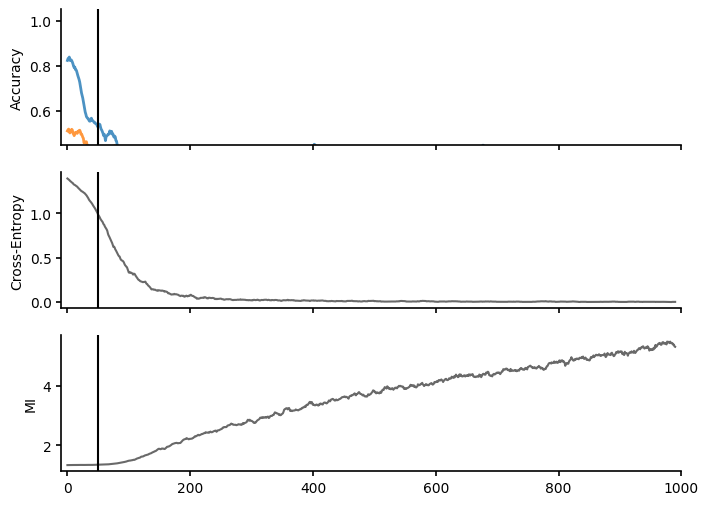

<Figure size 640x480 with 0 Axes>

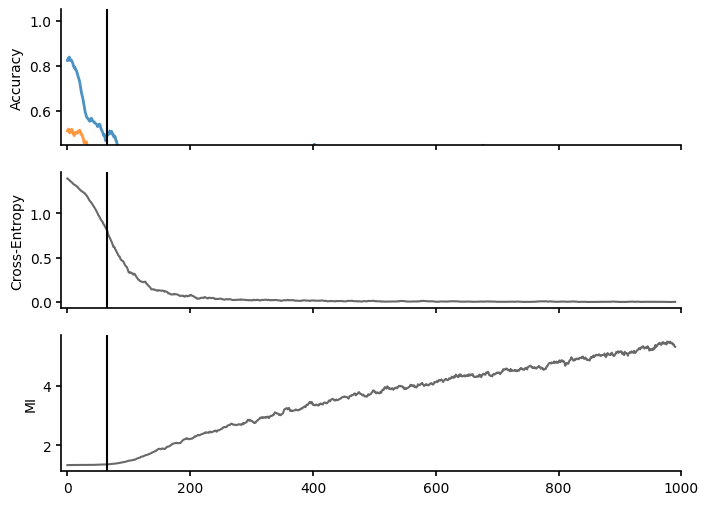

<Figure size 640x480 with 0 Axes>

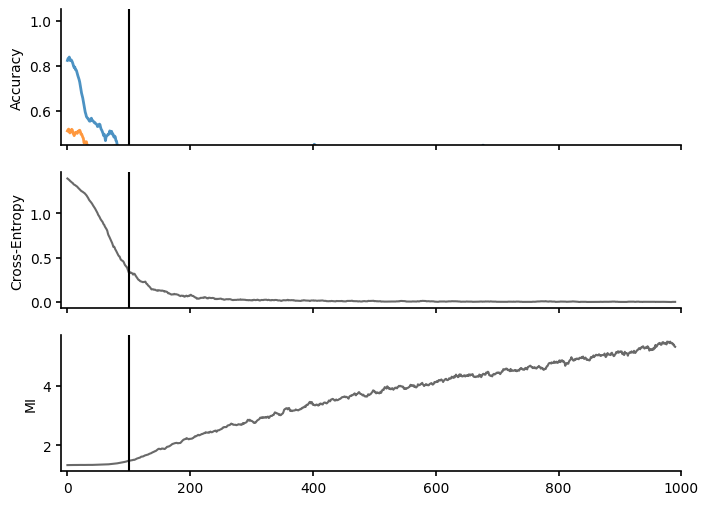

<Figure size 640x480 with 0 Axes>

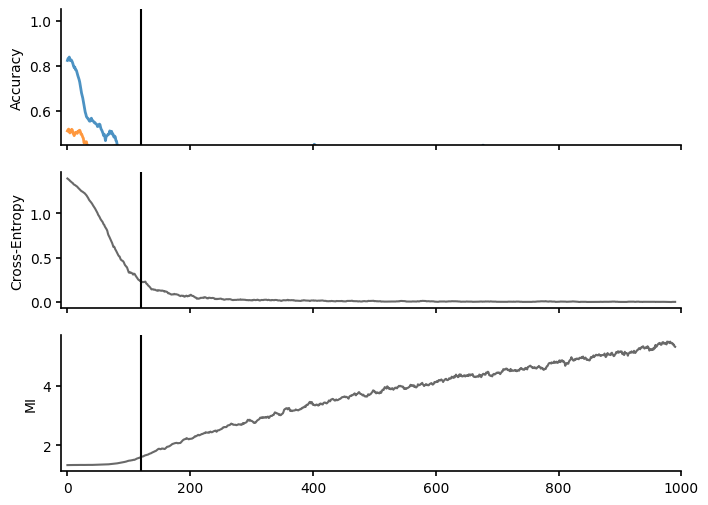

<Figure size 640x480 with 0 Axes>

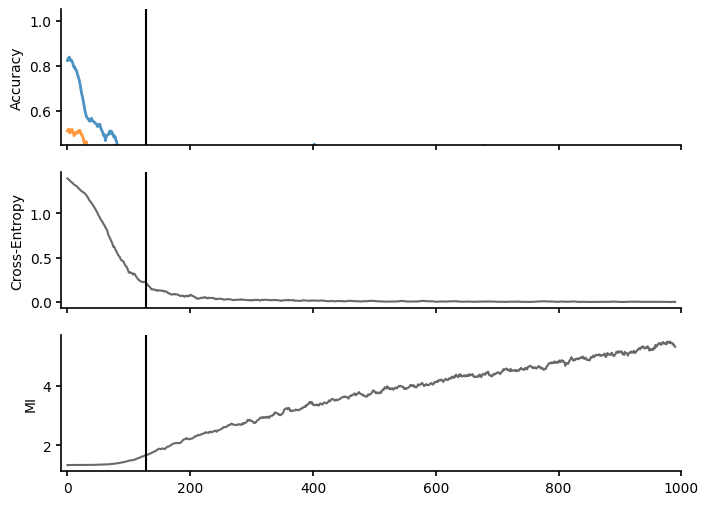

<Figure size 640x480 with 0 Axes>

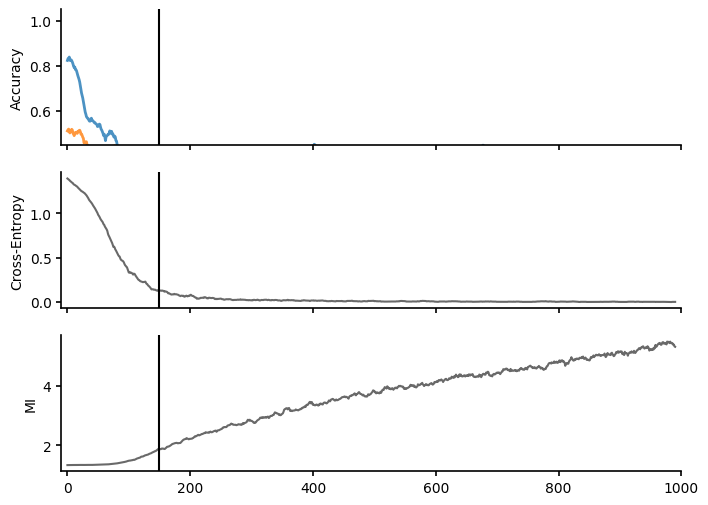

<Figure size 640x480 with 0 Axes>

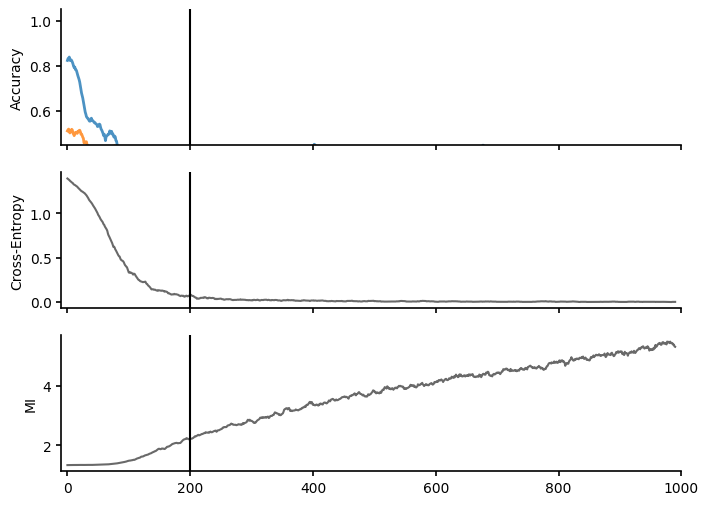

<Figure size 640x480 with 0 Axes>

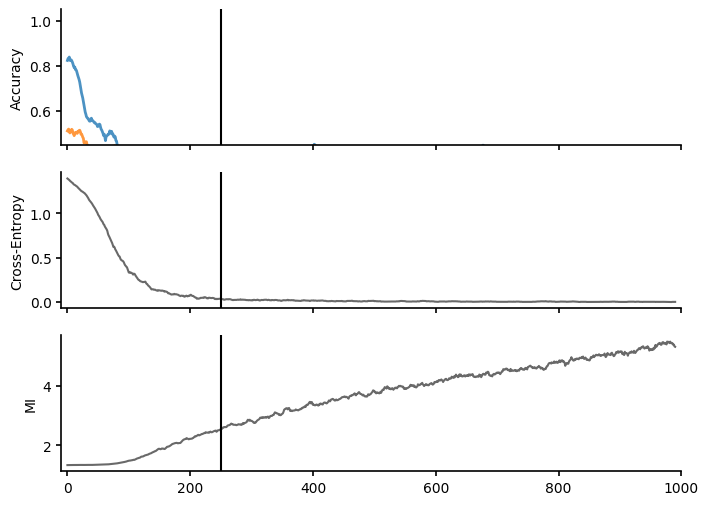

<Figure size 640x480 with 0 Axes>

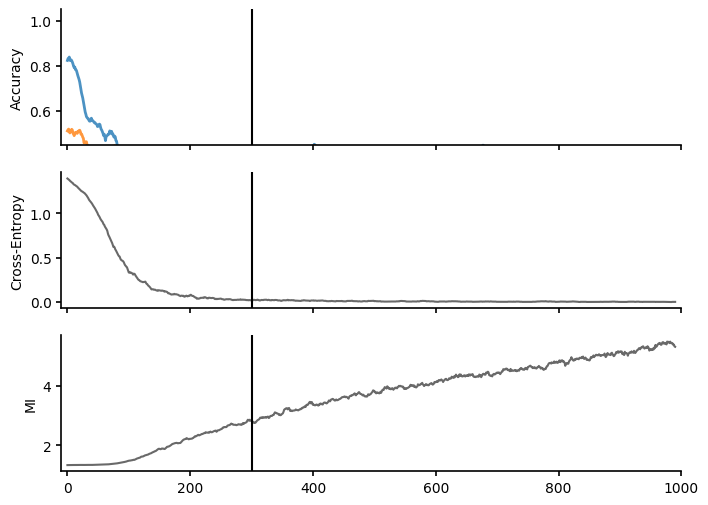

<Figure size 640x480 with 0 Axes>

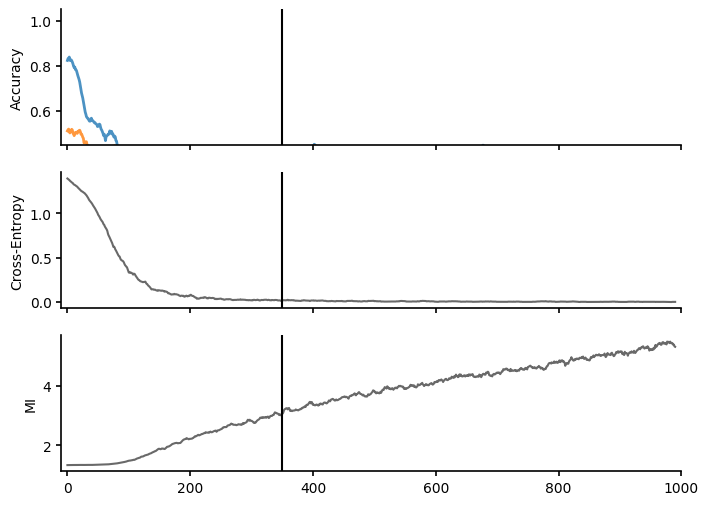

<Figure size 640x480 with 0 Axes>

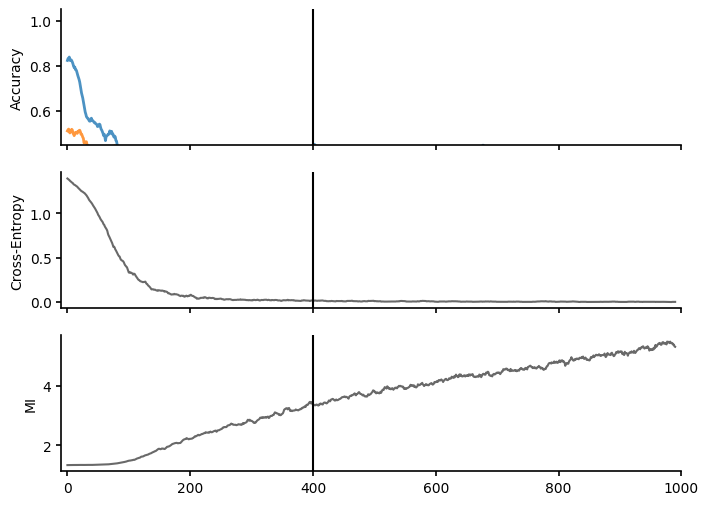

<Figure size 640x480 with 0 Axes>

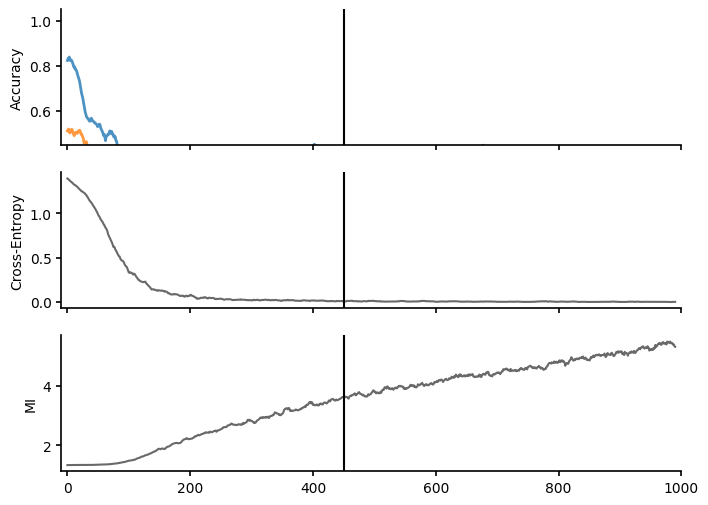

<Figure size 640x480 with 0 Axes>

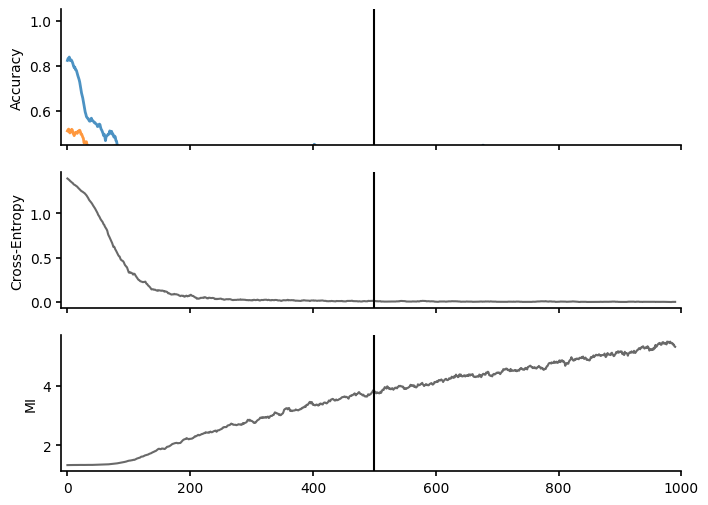

<Figure size 640x480 with 0 Axes>

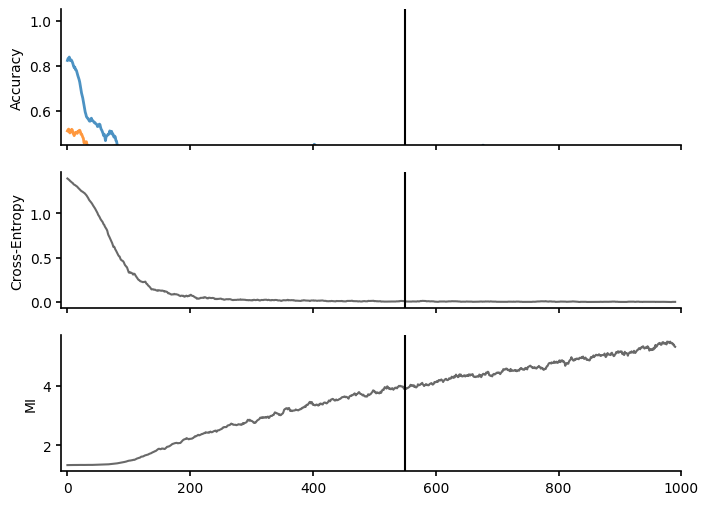

<Figure size 640x480 with 0 Axes>

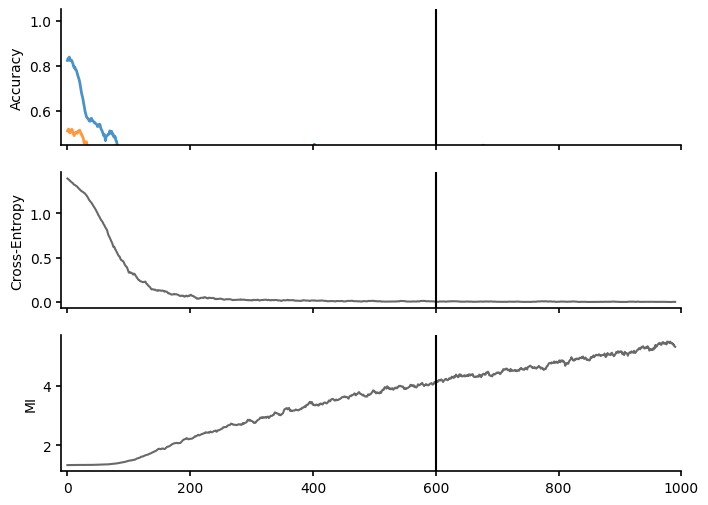

<Figure size 640x480 with 0 Axes>

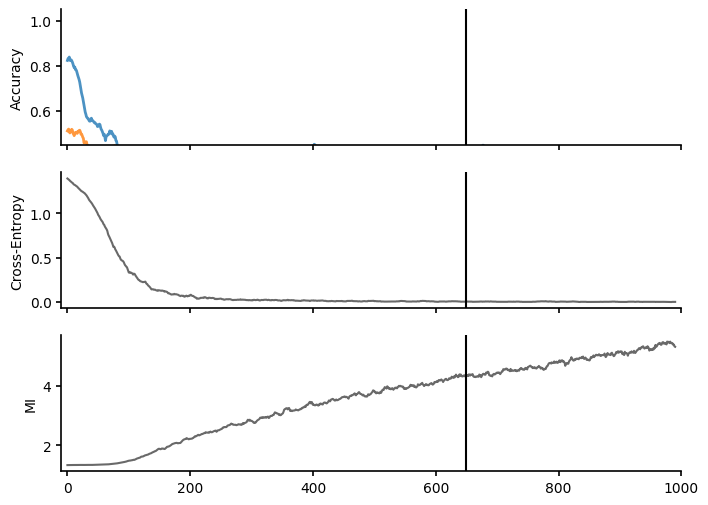

<Figure size 640x480 with 0 Axes>

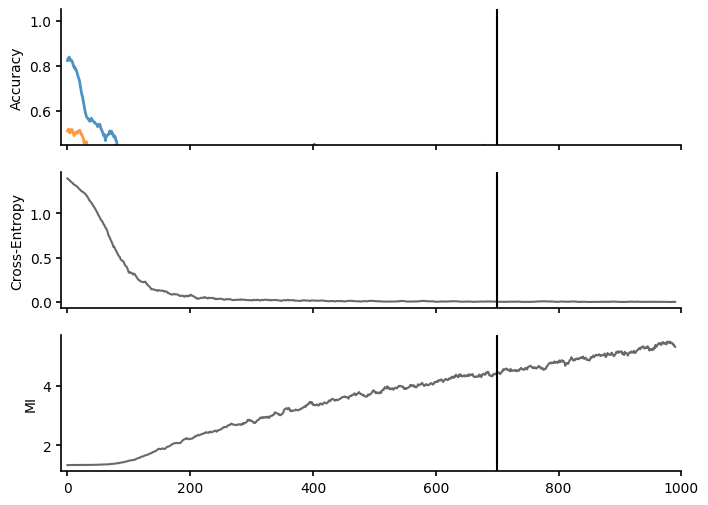

<Figure size 640x480 with 0 Axes>

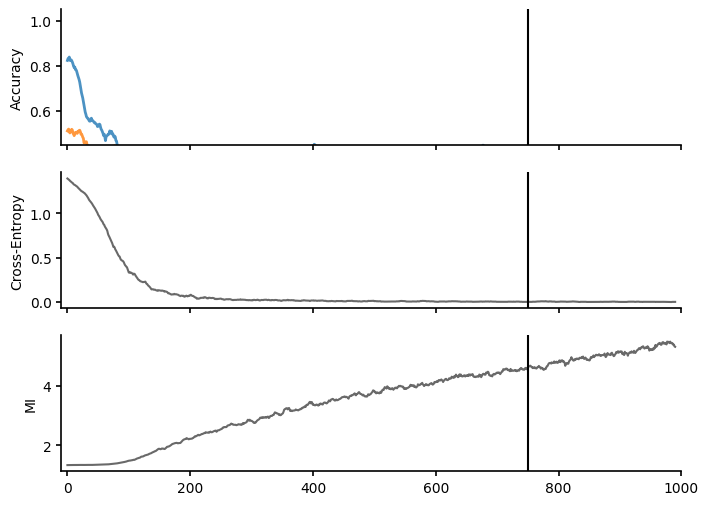

<Figure size 640x480 with 0 Axes>

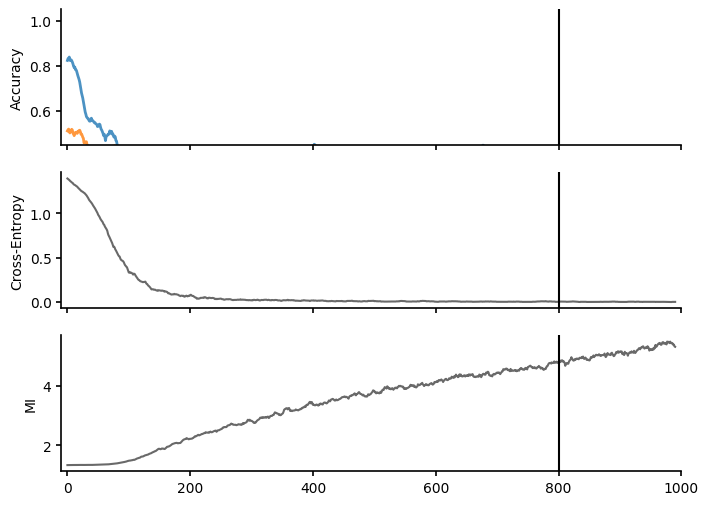

<Figure size 640x480 with 0 Axes>

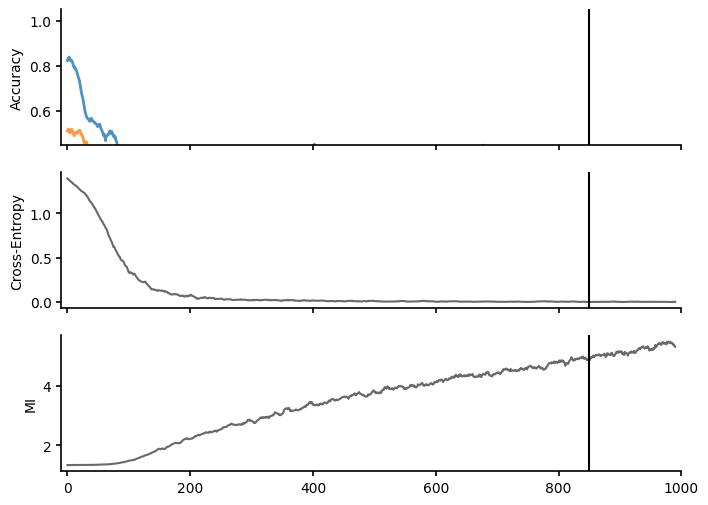

<Figure size 640x480 with 0 Axes>

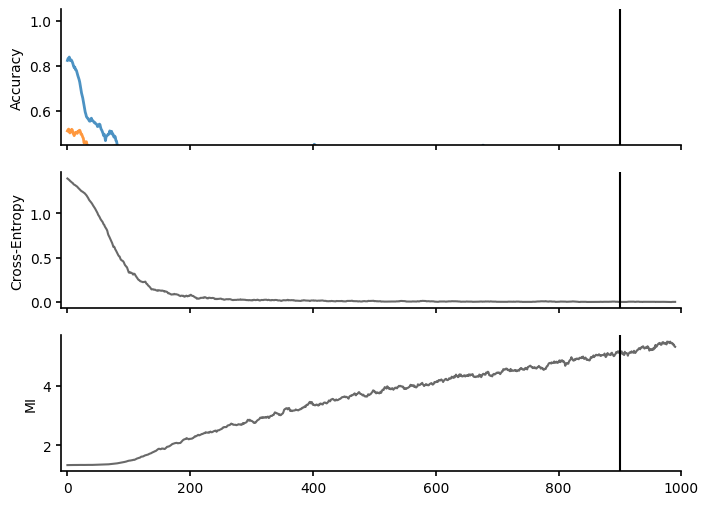

<Figure size 640x480 with 0 Axes>

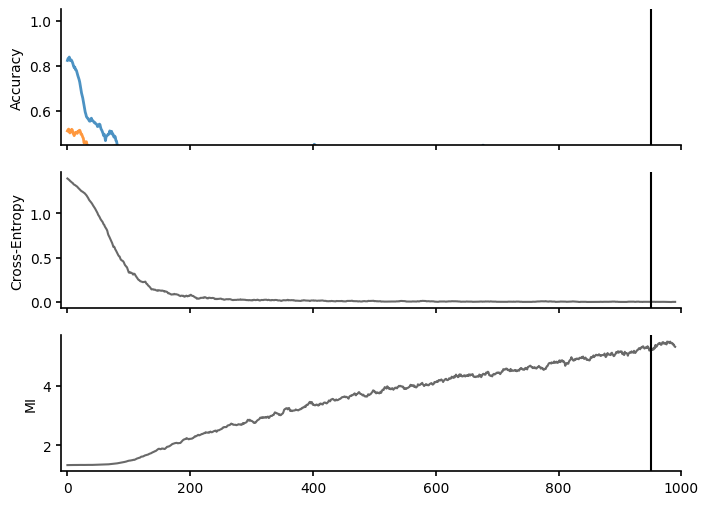

<Figure size 640x480 with 0 Axes>

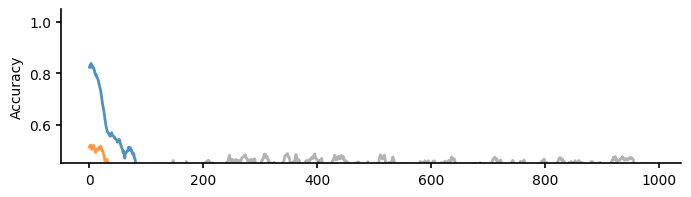

<Figure size 640x480 with 0 Axes>

In [7]:
#%% Draw learning curves
def draw_full_curve(t=None, with_erm=False):
    fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(8, 6))
    N = 10
    uniform = np.ones(N) / N
    axs[0].set_xlim(-10, 1000)
    axs[0].set_ylim(0.45, 1.05)
    smooth = lambda x: np.convolve(x, uniform, mode="valid")
    for i in [0, 1]:
        axs[0].plot(smooth(metrics[f"acc_{i}"]), alpha=0.8, linewidth=2)
    if with_erm:
        axs[0].plot(smooth(metrics["ERM_acc_0"]), c="dimgray", alpha=0.5, linewidth=2)
    axs[1].plot(smooth(metrics["xent"]), c="dimgray")
    axs[2].plot(smooth(metrics["repulsion_loss"]), c="dimgray")
    axs[0].set_ylabel("Accuracy")
    axs[1].set_ylabel("Cross-Entropy")
    axs[2].set_ylabel("MI")
    for ax in axs:
        ax.spines["bottom"].set_linewidth(1.2)
        ax.spines["left"].set_linewidth(1.2)
        ax.xaxis.set_tick_params(width=1.2)
        ax.yaxis.set_tick_params(width=1.2)
        ax.spines["top"].set_color("none")
        ax.spines["right"].set_color("none")
    if t:
        for ax in axs:
            ax.axvline(x=t, c="k")


draw_full_curve()
savefig(f"temp/{exp_name}/learning_curve_full")

draw_full_curve(with_erm=True)
savefig(f"temp/{exp_name}/learning_curve_full_with_ERM")

for t in fig_save_times:
    draw_full_curve(t=t)
    savefig(f"temp/{exp_name}/learning_curve_full_{t}")

plt.figure(figsize=(8, 2))
N = 10
uniform = np.ones(N) / N
plt.ylim(0.45, 1.05)
smooth = lambda x: np.convolve(x, uniform, mode="valid")
ax = plt.gca()
for i in [0, 1]:
    ax.plot(smooth(metrics[f"acc_{i}"]), alpha=0.8, linewidth=2)
ax.plot(smooth(metrics["ERM_acc_0"]), c="dimgray", alpha=0.5, linewidth=2)
ax.set_ylabel("Accuracy")
ax.spines["bottom"].set_linewidth(1.2)
ax.spines["left"].set_linewidth(1.2)
ax.xaxis.set_tick_params(width=1.2)
ax.yaxis.set_tick_params(width=1.2)
ax.spines["top"].set_color("none")
ax.spines["right"].set_color("none")
savefig(f"temp/{exp_name}/learning_curve_with_ERM")

In [8]:
#%% Stitch figures into gifs
import imageio
os.makedirs("gifs", exist_ok=True)

filenames = [f"figures/temp/{exp_name}/{t}_h0.png" for t in fig_save_times]
images = [imageio.imread(filename) for filename in filenames]
gif_head_0_filename = f"gifs/{exp_name}_h0.gif"
imageio.mimsave(gif_head_0_filename, images)

filenames = [f"figures/temp/{exp_name}/{t}_h1.png" for t in fig_save_times]
images = [imageio.imread(filename) for filename in filenames]
gif_head_1_filename = f"gifs/{exp_name}_h1.gif"
imageio.mimsave(gif_head_1_filename, images)

filenames = [f"figures/temp/{exp_name}/{t}_disagreement.png" for t in fig_save_times]
images = [imageio.imread(filename) for filename in filenames]
gif_disagreement_filename = f"gifs/{exp_name}_disagreement.gif"
imageio.mimsave(gif_disagreement_filename, images)

# filenames = [
#     f"figures/temp/{exp_name}/learning_curve_full_{t}.png" for t in fig_save_times
# ]
# images = [imageio.imread(filename) for filename in filenames]
# gif_curve_filename = f"gifs/{exp_name}_curve.gif"
# imageio.mimsave(gif_curve_filename, images)

# print("GIF creation complete! Files are in:")
# for fn in [gif_head_0_filename, gif_head_1_filename, gif_curve_filename]:
#     print(fn)


/var/folders/ch/dpql613n2b91xqvcd_m994rh0000gn/T/ipykernel_40035/3846648593.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images = [imageio.imread(filename) for filename in filenames]
/var/folders/ch/dpql613n2b91xqvcd_m994rh0000gn/T/ipykernel_40035/3846648593.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images = [imageio.imread(filename) for filename in filenames]
/var/folders/ch/dpql613n2b91xqvcd_m994rh0000gn/T/ipykernel_40035/3846648593.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the c